In [4]:
%run "../head.py"

In [5]:
from pathlib import Path

import numpy as np
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots

In [14]:
batches = ["Sperm", "Sperm_hg", "Tan2018", "mESC"]

IS_files = {
    "Sperm_hg" : h.ddir / "Sperm_hg.d3.proximity_map.20k.IS.tsv",
    "Sperm" : h.ddir / "Sperm.d3.proximity_map.20k.IS.tsv",
    "Tan2018" : h.ddir / "Tan2018.d3.proximity_map.20k.IS.tsv",
    "mESC" : h.ddir / "mESC.d3.proximity_map.20k.IS.tsv"
}
ISs = {
    batch : pd.read_csv(IS_files[batch], sep="\t")
    for batch in batches
}
def plot_boundary_IS_dist(ISs, batch, wsize):
    IS = ISs[batch]
    dat = IS.loc[IS[f"is_boundary_{wsize}"], f"log2_insulation_score_{wsize}"]
    fig = px.histogram(x=dat, range_x=[-3,1],histnorm="probability density")
    fig.update_xaxes(title=f"IS of found IS boundaries {batch}")
    fig.update_layout(
        title=f"distribution of {batch} boundaries' IS ({wsize} winSize)",
        plot_bgcolor="white",
        height=500,
        width=600
    )
    fig.show(renderer="png")
def plot_IS_dist(ISs, batch, wsize):
    IS = ISs[batch]
    dat = IS[f"log2_insulation_score_{wsize}"]
    fig = px.histogram(x=dat, range_x=[-2,2],histnorm="probability density")
    fig.update_xaxes(title=f"IS of all IS {batch}")
    fig.update_layout(
        title=f"distribution of {batch} IS ({wsize} winSize)",
        plot_bgcolor="white",
        height=500,
        width=600
    )
    fig.show(renderer="png")
def plot_IS_dists(ISs, batches, wsize, colprefix="log2_insulation_score_", range_y=(0,1.6),bd_only=False):
    # 计算子图的行数和列数
    total_plots = len(batches)
    cols = 2  # 可以根据需要调整列数
    rows = total_plots // cols + (total_plots % cols > 0)

    # 创建包含多个子图的画布
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=[f"{batch} (winSize {wsize})" for batch in batches])

    plot_count = 0
    for batch in batches:
        plot_count += 1
        row = (plot_count - 1) // cols + 1
        col = (plot_count - 1) % cols + 1

        # 获取数据
        IS = ISs[batch]
        if bd_only:
            dat = IS.loc[IS[f"is_boundary_{wsize}"], f"{colprefix}{wsize}"]
        else:
            dat = IS[f"{colprefix}{wsize}"]

        # treat df
        if colprefix == "boundary_strength_":
            dat = dat.apply(lambda x: np.log10(x))
        # 绘制直方图
        sub_fig = px.histogram(x=dat, range_x=[-2, 2], histnorm="probability density")
        for trace in sub_fig.data:
            fig.add_trace(trace, row=row, col=col)

        # 设置子图的X轴范围
        fig.update_xaxes(range=[-2, 2], row=row, col=col)
        fig.update_yaxes(range=[range_y[0], range_y[1]], row=row, col=col)

    # 更新整体布局
    fig.update_layout(
        title_text=f"Distribution of Insulation Scores (winSize {wsize})",
        plot_bgcolor="white",
        height=500 * rows,
        width=600 * cols
    )

    return fig

### defination of IS cols

In [26]:
print("batch\tboundary_count\tstrong_boundary_count")
for batch in batches:
    boundary_count = ISs[batch][f'is_boundary_200000'].sum()
    strong_boundary_count = (ISs[batch]["boundary_strength_200000"] > 0.5).sum()
    print(f"{batch}\t{boundary_count}\t{strong_boundary_count}")

batch	boundary_count	strong_boundary_count
Sperm	243	175
Sperm_hg	230	221
Tan2018	4353	2240
mESC	3027	868


In [7]:
batch = "Sperm"
print(
    ISs[batch]["log2_insulation_score_200000"].notna().sum(),
    ISs[batch]["boundary_strength_200000"].notna().sum(),
    ISs[batch]["is_boundary_200000"].sum(),
    (ISs[batch]["boundary_strength_200000"] > 0.5).sum()
)

129024 12144 243 175


### boundary strengths and IS

In [8]:
TF_map = {False: "blue", True: "red"}

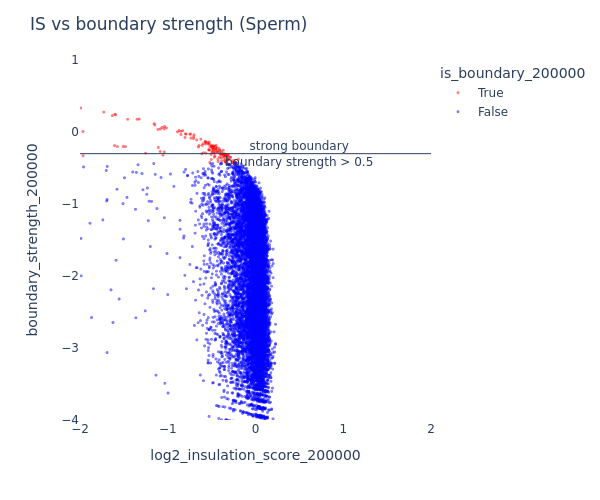

In [9]:
batch = "Sperm"
dat = ISs[batch][["log2_insulation_score_200000", "boundary_strength_200000", "is_boundary_200000"]].dropna().copy()
dat["boundary_strength_200000"] = dat["boundary_strength_200000"].apply(lambda x: np.log10(x))
fig = px.scatter(
    dat,
    x="log2_insulation_score_200000",
    y="boundary_strength_200000",
    color="is_boundary_200000",
    opacity=0.5,
    color_discrete_map=TF_map
)
fig.add_hline(
    y = np.log10(0.5),
    line_width=1,
)
fig.add_annotation(
    x=0.5,
    y=np.log10(0.5),
    text="strong boundary<br>boundary strength > 0.5",
    showarrow=False
)
fig.update_traces(marker=dict(size=3))
fig.update_xaxes(range=[-2, 2])
fig.update_yaxes(range=[-4, 1])
fig.update_layout(
    title_text=f"IS vs boundary strength ({batch})",
    plot_bgcolor="white",
    height=500,
    width=600
)
fig.show(renderer="png")

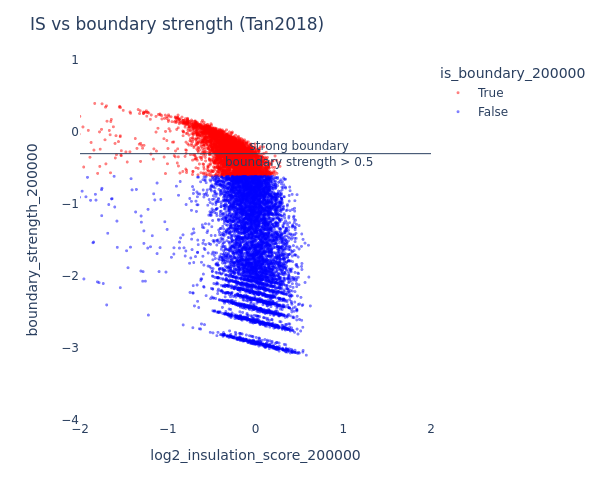

In [23]:
batch = "Tan2018"
dat = ISs[batch][["log2_insulation_score_200000", "boundary_strength_200000", "is_boundary_200000"]].dropna().copy()
dat["boundary_strength_200000"] = dat["boundary_strength_200000"].apply(lambda x: np.log10(x))
fig = px.scatter(
    dat,
    x="log2_insulation_score_200000",
    y="boundary_strength_200000",
    color="is_boundary_200000",
    opacity=0.5,
    color_discrete_map=TF_map
)
fig.add_hline(
    y = np.log10(0.5),
    line_width=1,
)
fig.add_annotation(
    x=0.5,
    y=np.log10(0.5),
    text="strong boundary<br>boundary strength > 0.5",
    showarrow=False
)
fig.update_traces(marker=dict(size=3))
fig.update_xaxes(range=[-2, 2])
fig.update_yaxes(range=[-4, 1])
fig.update_layout(
    title_text=f"IS vs boundary strength ({batch})",
    plot_bgcolor="white",
    height=500,
    width=600
)
fig.show(renderer="png")

log2_IS越小越可能是boundary，可以看到，sperm整体缺少负IS。

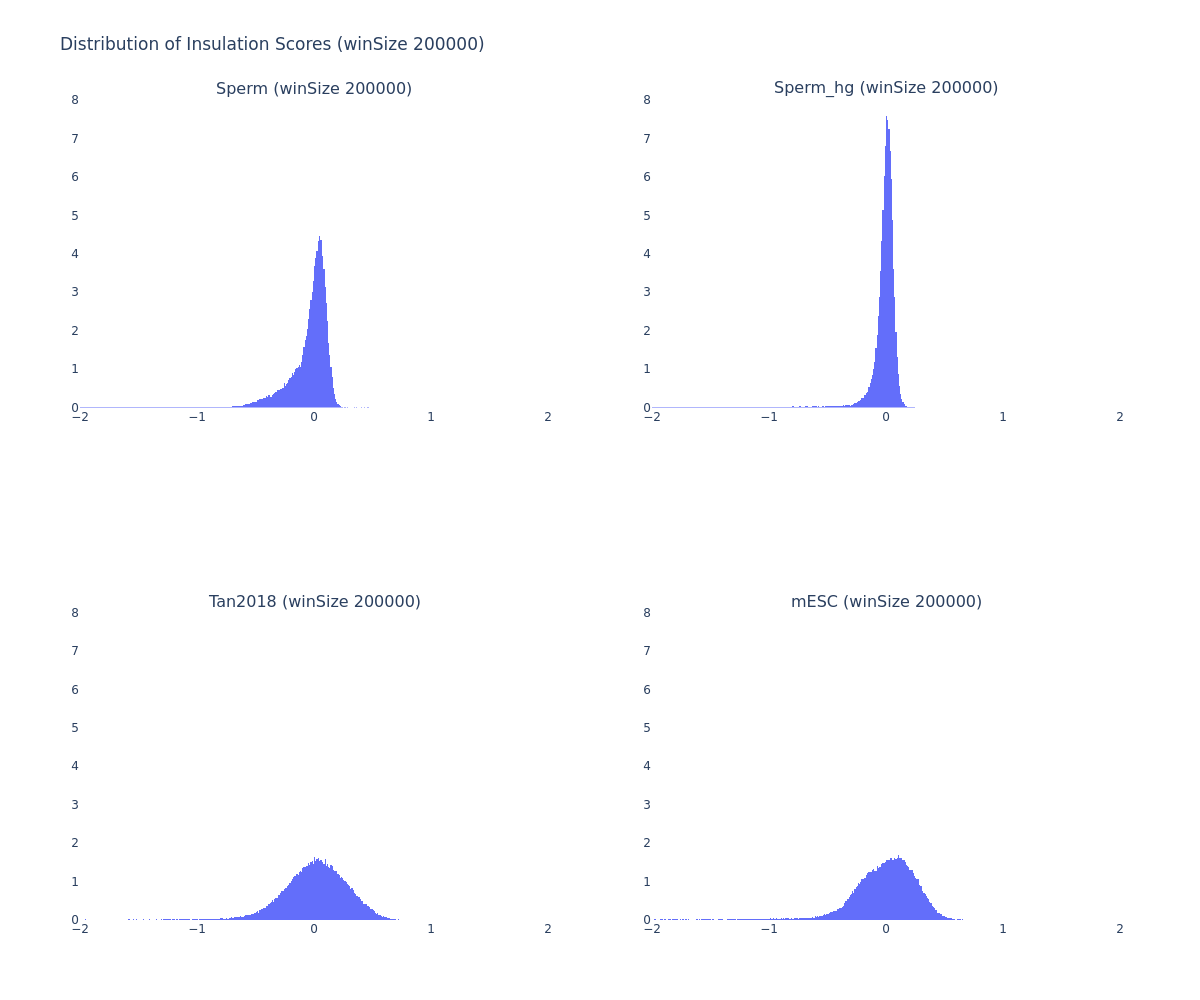

In [16]:
fig = plot_IS_dists(ISs, batches, 200000, range_y=[0,8])
fig.show(renderer="png")

1. boundary富集整个IS分布的负半边，也就是说IS是一个全局不错的boundary指标，用local的东西精炼他只是让它更稳定。
2. sperm很明显，局部filter出来的boundary没有偏负分布，可能绝大部分是noise。

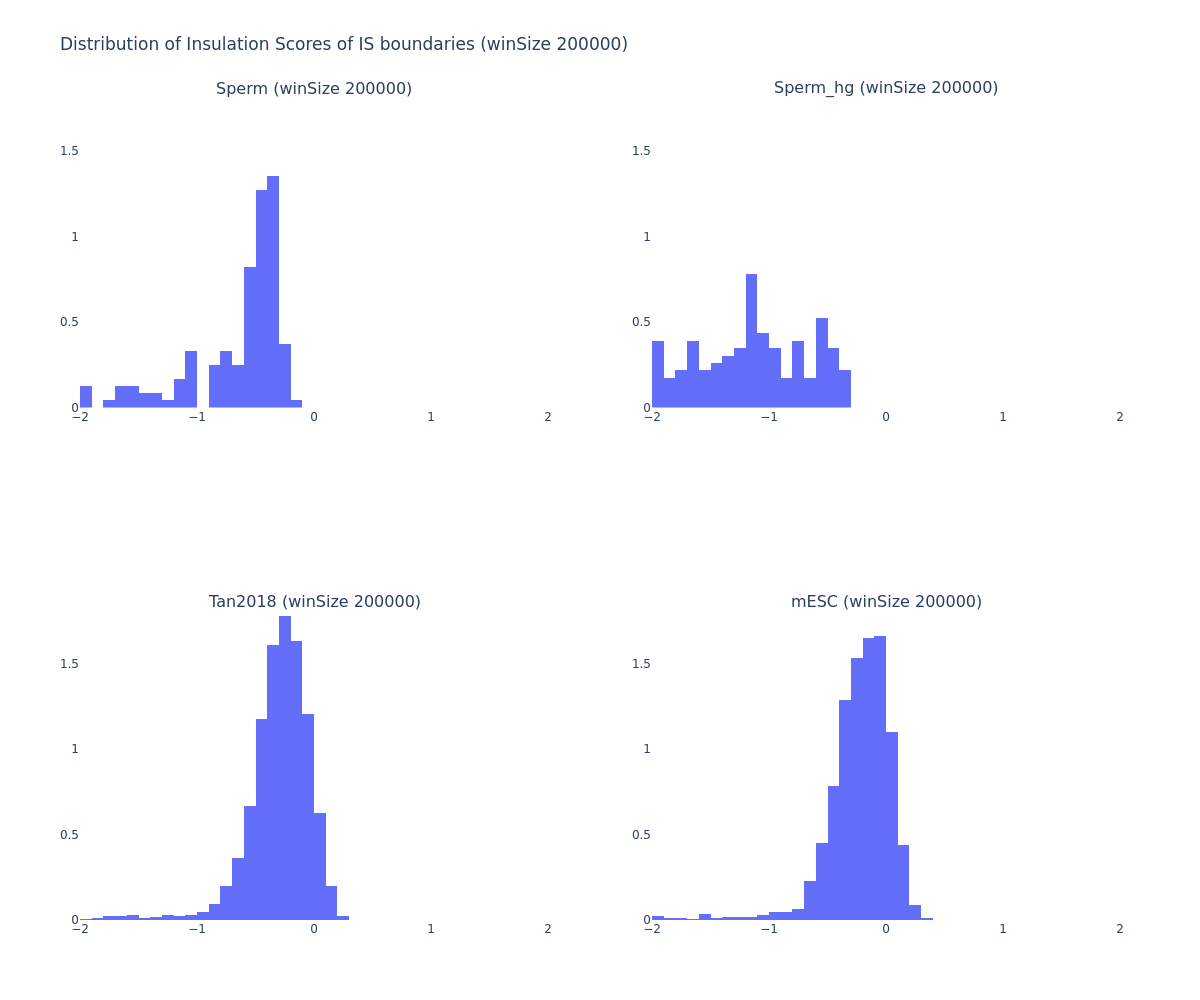

In [17]:
fig = plot_IS_dists(ISs, batches, 200000, bd_only=True)
fig.update_yaxes(range=[0, 1.8])
fig.update_layout(
    title = "Distribution of Insulation Scores of IS boundaries (winSize 200000)",
)
fig.show(renderer="png")

boundary strength：所有local minima的peak prominence（画图用了log10）  
Sperm明显偏小。

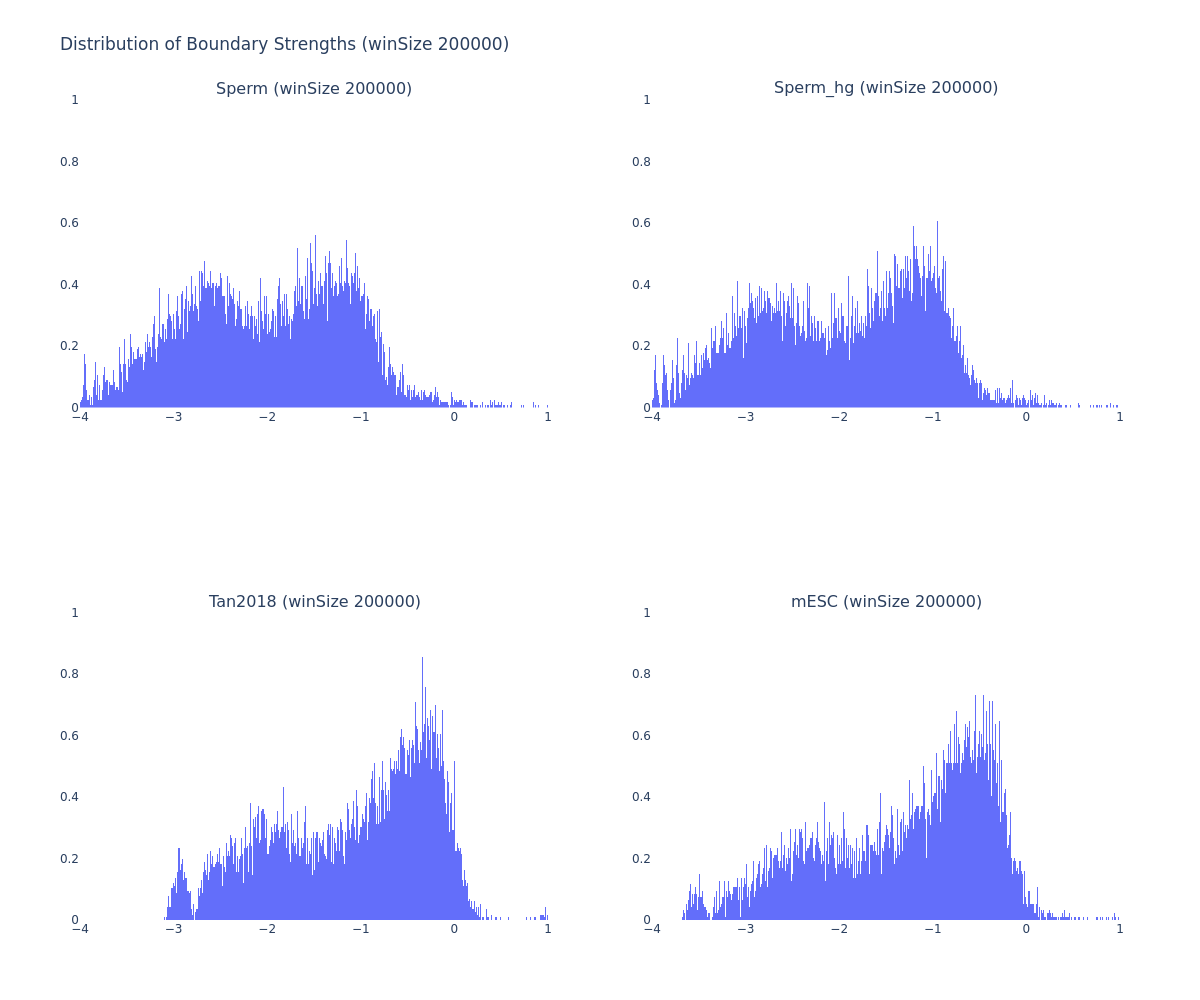

In [18]:
fig = plot_IS_dists(ISs, batches, 200000, colprefix="boundary_strength_", bd_only=False)
fig.update_yaxes(range=[0, 1])
fig.update_xaxes(range=[-4,1])
fig.update_layout(
    title = "Distribution of Boundary Strengths (winSize 200000)",
)
fig.show(renderer="png")

用了Li或者Otsu来做filter，显然在Sperm上给出了更低的threshold。

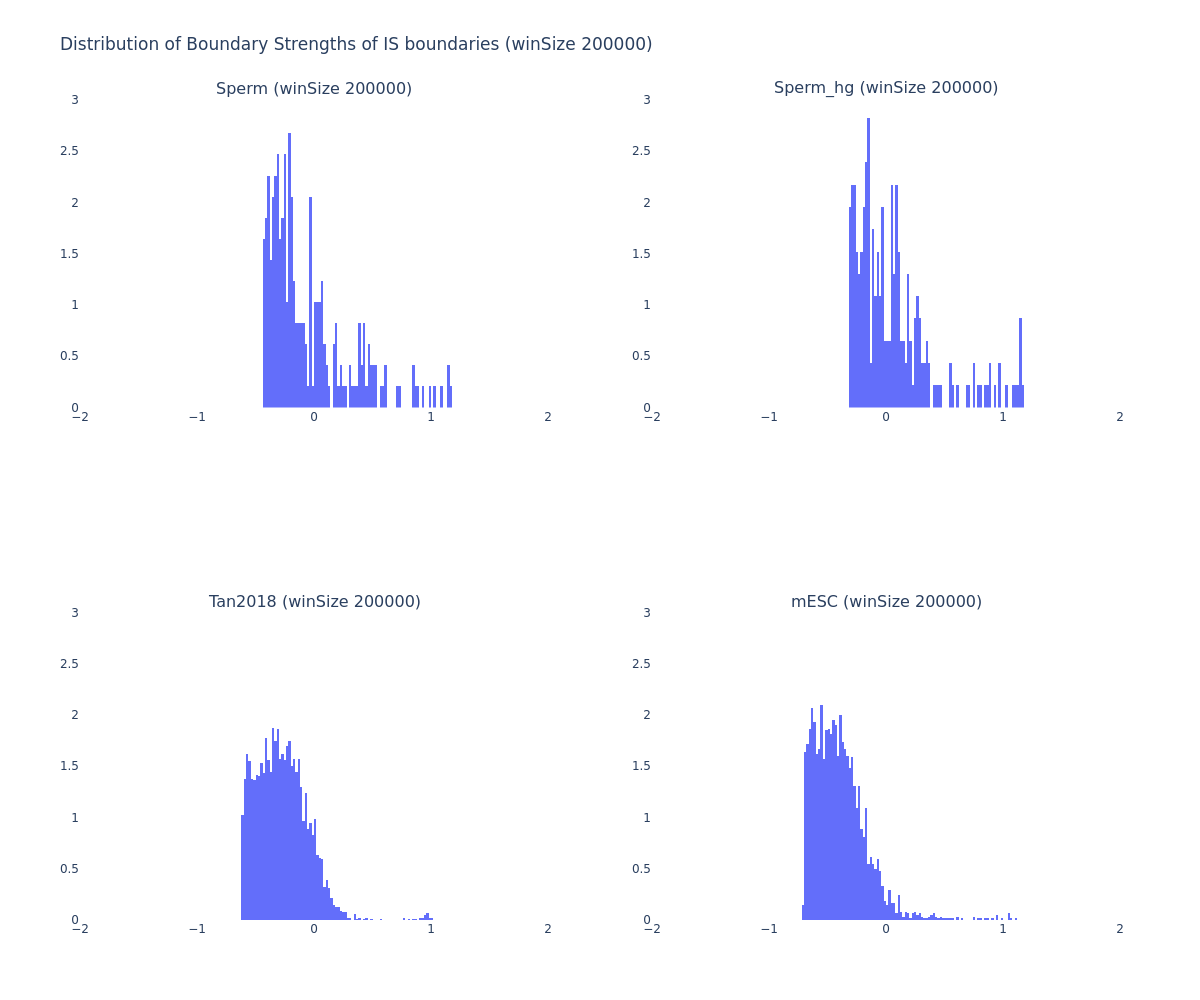

In [20]:
fig = plot_IS_dists(ISs, batches, 200000, colprefix="boundary_strength_", bd_only=True)
fig.update_yaxes(range=[0, 3])
fig.update_layout(
    title = "Distribution of Boundary Strengths of IS boundaries (winSize 200000)",
)
fig.show(renderer="png")

用Strong boundaries确实可能去掉一些noise。

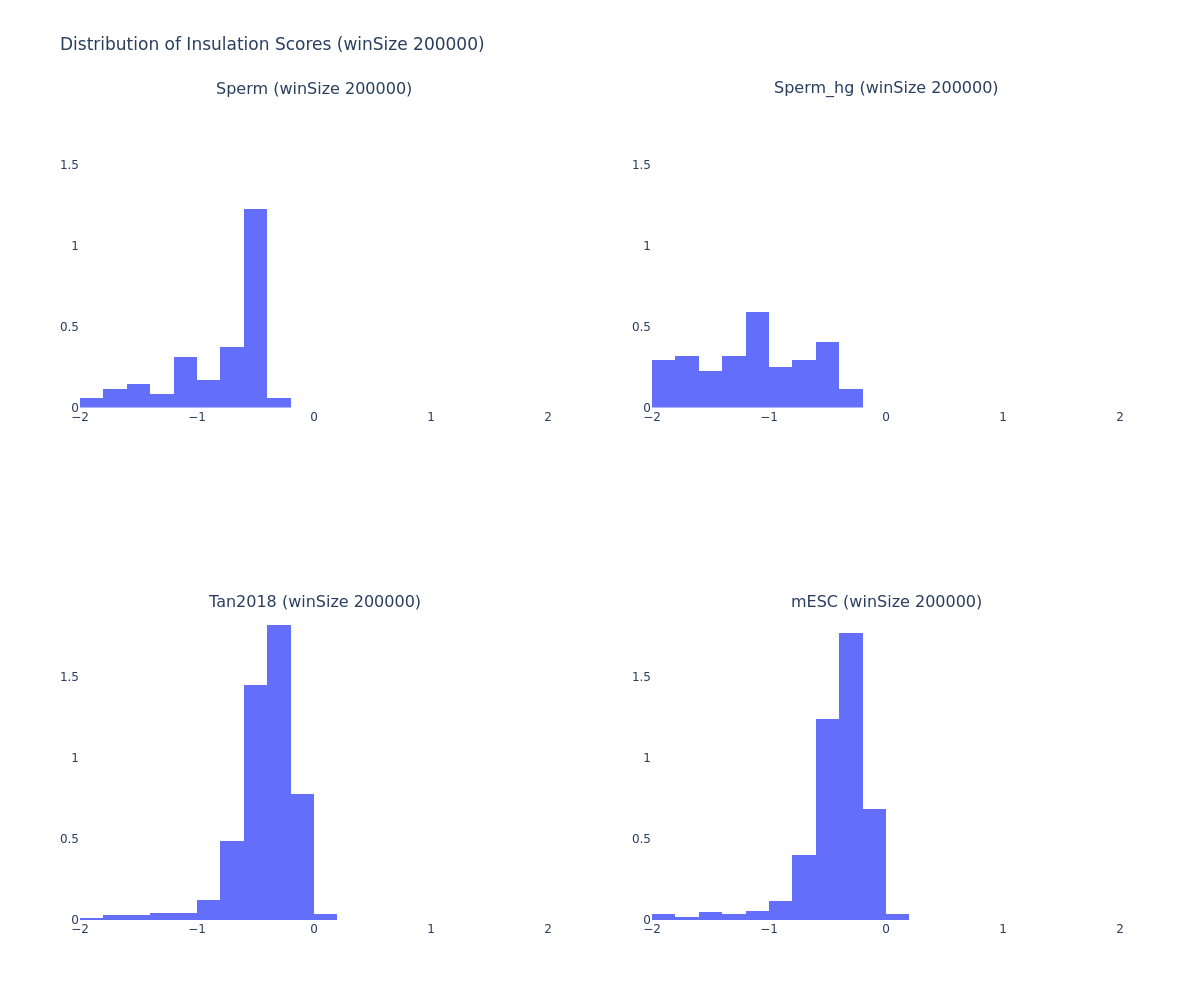

In [21]:
fig = plot_IS_dists(
    {batch: ISs[batch].query("boundary_strength_200000 > 0.5") for batch in batches},
    batches,
    200000,
)
fig.update_yaxes(range=[0, 1.9])
fig.show(renderer="png")